# **Relación de establecimientos de salud de primer nivel de atención en el Perú**

Al ser el primer contacto con la población, el Primer Nivel de Atención en Salud (PNAS) busca satisfacer las necesidades de salud de la persona, familia y comunidad, de manera ambulatoria.

Elaborado por el Ministerio de Salud, actualizado al 25 de enero de 2023: https://www.gob.pe/institucion/minsa/informes-publicaciones/391864-establecimientos-de-salud-de-primer-nivel-de-atencion-en-el-peru

Columnas:

1. Nombre del establecimiento: El nombre del establecimiento de salud.

2. Clasificación: La clasificación del establecimiento de salud que se relaciona con su categoría.

3. Tipo: El tipo de centro de salud, que se relaciona con la facilidad de internamiento o no.

4. **Departamento:** El departamento geográfico en el que se encuentra ubicado el establecimiento.

5. **Provincia:** La provincia dentro del departamento donde se encuentra ubicado el establecimiento de salud.

6. **Distrito:** El distrito específico dentro de la provincia donde se encuentra ubicado el establecimiento de salud.

7. Dirección: La dirección completa del establecimiento de salud.

8. **Categoría:** La categoría a la que pertenece el centro de salud, que puede clasificarse de la siguiente manera:

  *  Categoría I-1: Los establecimientos de salud de esta categoría, cuentan con profesionales de la salud, pero no tienen médicos cirujanos.
  *  Categoría I-2: Puesto de salud o posta de salud (con médico). Además de los consultorios médicos (con médicos con o sin especialidad).
  *  Categoría I-3: Corresponde a los centros de salud, centros médicos, centros médicos especializados y policlínicos.
  *  Categoría I-4: Agrupan los centros de salud y los centros médicos con camas de internamiento.

9. Teléfono: El número de teléfono de contacto para el establecimiento de salud.

10. Horario: El horario de funcionamiento del establecimiento de salud, que incluye las horas de atención.

11. **AÑO:** El año en el que se iniciaron las actividades en el establecimiento de salud.














## **<font color="skyblue"> Conseguir datos de la columna año </font>**

Para fines del trabajo era necesario tener información temporal de los establecimientos de salud que no se encontraba en el la tabla original.
Se utilizó web scraping para conseguir el año de inicio de actividades de la mayoría de centros de salud a partir de esta pagina del Ministerio de Salud: https://www.establecimientosdesalud.info/


In [ ]:
import requests #Se utiliza para realizar solicitudes HTTP a través de la web.
from bs4 import BeautifulSoup #Se utiliza para analizar y extraer información de documentos HTML y XML.
import re #Permite realizar operaciones de búsqueda y manipulación de cadenas de texto mediante patrones definidos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Regularmente, el url para cada establecimiento de salud sigue la siguiente estructura:
#https://www.establecimientosdesalud.info/puno/centro-de-salud-metropolitano-puno-puno/
#https://www.establecimientosdesalud.info/Departamento/NombreEstablecimiento-Distrito/
urls = [
'https://www.establecimientosdesalud.info/puno/centro-de-salud-metropolitano-puno-puno/',
'https://www.establecimientosdesalud.info/lima/puesto-de-salud-cerro-alegre-imperial/',
'https://www.establecimientosdesalud.info/cajamarca/puesto-de-salud-huacora-la-coipa/']

# Crear una lista para almacenar los datos
data = []

for url in urls:
    response = requests.get(url)
    content = response.content

    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')
        #Importante la etiqueta "STRONG"
        fecha_inicio_texto = soup.find('strong', string='Inicio de actividades:')
        nombre_establecimiento = url.split('/')[-2].replace('-', ' ').title()  # Obtener el nombre del establecimiento de la URL

        if fecha_inicio_texto:
            fecha_inicio = fecha_inicio_texto.find_next_sibling(string=True) #martes, 21 de Noviembre de 2000
            if fecha_inicio:
                año_inicio_match = re.search(r'\d{4}', fecha_inicio) #2000 (patrón de 4 dígitos)
                if año_inicio_match:
                    año_inicio = año_inicio_match.group()  # Obtiene el año coincidente
                    data.append([nombre_establecimiento, año_inicio])
                else:
                    print(f"No se encontró un año válido para {nombre_establecimiento}.")
            else:
                print(f"No se encontró la fecha de inicio de actividades para {nombre_establecimiento}.")
        else:
            print(f"No se encontró información de inicio de actividades para {nombre_establecimiento}.")
    else:
        print(f"La solicitud a la URL {url} devolvió un código de estado {response.status_code}.")

# Crear un DataFrame a partir de la lista de datos
df_a = pd.DataFrame(data, columns=['Nombre del Establecimiento', 'Año de Inicio de Actividades'])

# Nombre del archivo de Excel en el que deseas guardar el DataFrame
nombre_archivo = 'completo.xlsx'

# Guarda el DataFrame en un archivo de Excel
df_a.to_excel(nombre_archivo, index=False)
print(df_a)

                Nombre del Establecimiento Año de Inicio de Actividades
0  Centro De Salud Metropolitano Puno Puno                         2008
1    Puesto De Salud Cerro Alegre Imperial                         1996
2         Puesto De Salud Huacora La Coipa                         2000


## **<font color="skyblue">Obtener suma de establecimientos por Departamento, Provincia, Distrito, Año y Categoría**</font>

In [ ]:
#Crear el dataframa df con los datos de los establecimiento de salud
df = pd.read_excel("Hospitales.xlsm",sheet_name= "Listado de Establecimientos")

In [ ]:
df.sample(5)

,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,Dirección,Categoria,Teléfono,Horario,AÑO
1247,AYAHUAY,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,APURIMAC,ANTABAMBA,EL ORO,OTROS BARRIO EL ORO S/N S/N BARRIO EL ORO S/N ...,I-2,952646544,12 HORAS,2010.0
3186,IDMA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CUSCO,LA CONVENCION,SANTA ANA,OTROS CENTRO POBLADO IDMA CENTRO POBLADO IDMA ...,I-1,084-281247,07:30 A 15:30 HORAS,1977.0
5563,"PUESTO DE SALUD ""VILLA SOLIDARIDAD""",PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SAN JUAN DE MIRAFLORES,CALLE 9 SN MZ F-A LOTE 3 ASENTAMIENTO HUMANO ...,I-2,014508371,8:00-14:00,1984.0
3567,PUESTO DE SALUD SANTA ROSA DE MALLMA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANCAVELICA,TAYACAJA,QUICHUAS,CALLE CALLE CENTRAL S/N S/N CALLE CENTRAL S/N ...,I-1,988316275,8:00 - 14:00,2010.0
4415,PACCHA - LA OROYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,YAULI,PACCHA,JIRÓN JR.PROGRESO S/N NÚMERO S/N DISTRITO PACC...,I-2,064-408145,07:00 - 19:00 HORAS,1996.0


In [ ]:
df.columns

Index(['Nombre del establecimiento', 'Clasificación', 'Tipo', 'Departamento',
       'Provincia', 'Distrito', 'Dirección', 'Categoria', 'Teléfono',
       'Horario', 'AÑO'],
      dtype='object')

In [ ]:
df.shape # 8279 establecimientos de salud

(8279, 11)

In [ ]:
df.isnull().sum() / df.shape[0] *100 # Verificar valores nulos. Lo más importante es el año

Nombre del establecimiento    0.000000
Clasificación                 0.157024
Tipo                          0.000000
Departamento                  0.000000
Provincia                     0.000000
Distrito                      0.000000
Dirección                     0.000000
Categoria                     0.000000
Teléfono                      0.495229
Horario                       0.000000
AÑO                           0.483150
dtype: float64

In [ ]:
#Resolver valores Nan
df['AÑO'].fillna(2004, inplace=True) #Reemplazar los Nan con 2004 porque es el año de inicio de las claves. Solo representa el 0.5% y pertenecen a lugares diferentes.
df['AÑO'] = df['AÑO'].apply(lambda x: 2004 if x < 2004 else x) #Cambiar los años menores a 2004 a 2004 para realizar la sumatoria.
df['AÑO'] = df['AÑO'].apply(lambda x: 2022 if x == 2023 else x) #Cambiar el año 2023 a 2022 porque es la fecha máxima.

In [ ]:
df.isnull().sum() #Luego de este cambio se verifica que no hayan valores Nan en la columna AÑO.

Nombre del establecimiento     0
Clasificación                 13
Tipo                           0
Departamento                   0
Provincia                      0
Distrito                       0
Dirección                      0
Categoria                      0
Teléfono                      41
Horario                        0
AÑO                            0
dtype: int64

In [ ]:
#1. Crear dataframe df_oficial con las claves de Departamento, Provincia y Distrito
df_oficial = df[["Departamento", "Provincia", "Distrito"]].copy()
df_oficial.head()

,Departamento,Provincia,Distrito
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,AMAZONAS,UTCUBAMBA,BAGUA GRANDE
2,AMAZONAS,LUYA,PISUQUIA
3,AMAZONAS,UTCUBAMBA,LONYA GRANDE
4,AMAZONAS,UTCUBAMBA,BAGUA GRANDE


In [ ]:
#Quitar duplicados para que permanezcan los valores únicos
df_oficial = df_oficial.drop_duplicates(subset=['Departamento', 'Provincia', 'Distrito'], keep='first')
df_oficial.shape

(1866, 3)

In [ ]:
#Coincidir los valores únicos de DPD con años desde 2004 a 2022 para poder hacer la concatenación con las demás tablas.
def repetirAños(df, listaA):
  df_c = pd.DataFrame()
  for a in listaA:
    df_t = df.copy()
    df_t["AÑO"] = a
    df_c = pd.concat([df_c, df_t])
  return df_c

In [ ]:
años = [año for año in range(2004, 2023)]
df_oficial = repetirAños(df_oficial, años)

In [ ]:
print(años) #Años de 2004 a 2022

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
df_oficial.head() #Muestra de los 5 primeros registros.

,Departamento,Provincia,Distrito,AÑO
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2004
1,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,2004
2,AMAZONAS,LUYA,PISUQUIA,2004
3,AMAZONAS,UTCUBAMBA,LONYA GRANDE,2004
5,AMAZONAS,BAGUA,IMAZA,2004


In [ ]:
df_oficial.AÑO.nunique() #Cantidad de años

19

In [ ]:
df_oficial.shape #Se tienen 35454 filas al terminar de repetir los años (1866 * 19)

(35454, 4)

In [ ]:
df_dummies = pd.get_dummies(df, columns=['Categoria']) #Convertir la columna categoria en Dummies (I1, I2, I3, I4)
# Mostrar el DataFrame resultante con las variables dummy
df_dummies.sample(5)

,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,Dirección,Teléfono,Horario,AÑO,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
5684,CARAMPOMA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAROCHIRI,CARAMPOMA,JIRÓN JIRON 3 DE OCTUBRE N°540 JIRON 3 DE OCTU...,01-3559720,LUN-SAB: 08:00-14:00,2004.0,0,1,0,0
4612,ARCAYPATA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LA LIBERTAD,PATAZ,BULDIBUYO,OTROS ANEXO ARCAYPATA DISTRITO BULDIBUYO PROVI...,044-840200,8:00 - 18:00,2013.0,1,0,0,0
5194,CHACARILLA DE OTERO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SAN JUAN DE LURIGANCHO,JIRÓN JR. JOSE ANTONIO ENCINAS Nº 155 - URB.CH...,4583290 - 4583230,07:30 - 19:30,2004.0,0,0,1,0
2071,QUINUA BAJA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,HUALGAYOC,BAMBAMARCA,OTROS COMUNIDAD QUINUA BAJA DISTRITO BAMBAMARC...,966509004,8:00 - 14:00,2010.0,1,0,0,0
104,COROSHA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,AMAZONAS,BONGARA,COROSHA,AVENIDA AVENIDA S/N - CARRETERA A JUMBILLA - C...,041-477044,8:00 - 14:00,2004.0,0,1,0,0


In [ ]:
df_dummies.shape #Misma cantidad de filas

(8279, 14)

In [ ]:
df_dummies["AÑO"].value_counts()

2004.0    6551
2010.0     228
2005.0     166
2009.0     157
2008.0     157
2006.0     146
2011.0     117
2007.0     116
2012.0      90
2019.0      90
2013.0      90
2018.0      73
2014.0      62
2017.0      51
2015.0      49
2020.0      47
2016.0      46
2021.0      31
2022.0      12
Name: AÑO, dtype: int64

In [ ]:
#Función para acumular la cantidad de establecimientos por Departamento, Provincia, Distrito y Categoría en cada año.
def calcularSumaAcumulativaPorCategorias(df1, df2, categorias):
    # Left Join de df_oficial y df_dummies en función de las columnas 'Departamento', 'Provincia', 'Distrito', 'AÑO'
    merged_df = df1.merge(df2, on=['Departamento', 'Provincia', 'Distrito', 'AÑO'], how='left')
    # Crear un DataFrame vacío para almacenar los resultados
    resultado_final = pd.DataFrame()
    # Recorrer todos los años desde 2004 hasta 2022:
    for año in range(2004, 2023):
        # Filtra las filas donde el año de sea menor o igual al año actual
        filtered_df = merged_df[(merged_df['AÑO'] <= año)]
        # Calcular la suma para cada categoría y AÑO
        resultado_categoria = filtered_df.groupby(['Departamento', 'Provincia', 'Distrito', 'AÑO'])[categorias].sum().reset_index()
        # Establecer el AÑO
        resultado_categoria['AÑO'] = año
        # Agregar al DataFrame final
        resultado_final = pd.concat([resultado_final, resultado_categoria], ignore_index=True)

    # Pivotea las columnas de categorías para convertir las categorías en una sola fila
    resultado_final = resultado_final.pivot_table(index=['Departamento', 'Provincia', 'Distrito', 'AÑO'], values=categorias, aggfunc='sum').reset_index()
    return resultado_final

In [ ]:
# Lista de categorías
categorias = ["Categoria_I-1", "Categoria_I-2", "Categoria_I-3", "Categoria_I-4"]

# Utilizar función para sumar en las categorias
df_oficial = calcularSumaAcumulativaPorCategorias(df_oficial, df_dummies, categorias)

In [ ]:
#Eliminar duplicados
df_oficial = df_oficial.drop_duplicates( keep='first')

In [ ]:
df_oficial #Finalmente tiene las mismas 35454 filas y la cantidad de establecimientos por categoria y año

,Departamento,Provincia,Distrito,AÑO,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
0,AMAZONAS,BAGUA,ARAMANGO,2004,5.0,3.0,3.0,0.0
1,AMAZONAS,BAGUA,ARAMANGO,2005,10.0,3.0,3.0,0.0
2,AMAZONAS,BAGUA,ARAMANGO,2006,13.0,3.0,3.0,0.0
3,AMAZONAS,BAGUA,ARAMANGO,2007,13.0,3.0,3.0,0.0
4,AMAZONAS,BAGUA,ARAMANGO,2008,13.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...
35449,UCAYALI,PURUS,PURUS,2018,7.0,0.0,1.0,0.0
35450,UCAYALI,PURUS,PURUS,2019,7.0,0.0,1.0,0.0
35451,UCAYALI,PURUS,PURUS,2020,7.0,0.0,1.0,0.0
35452,UCAYALI,PURUS,PURUS,2021,7.0,0.0,1.0,0.0


## **<font color="skyblue"> Visualización de los datos </font>**

***Gráfico del porcentaje de establecimientos por categoría en el Perú***

In [ ]:
df_por_categoria = df_oficial[df_oficial.AÑO == 2022]
df_por_categoria

,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
Departamento,,,,
AMAZONAS,363.0,38.0,77.0,2.0
ANCASH,265.0,89.0,49.0,11.0
APURIMAC,219.0,112.0,35.0,27.0
AREQUIPA,36.0,130.0,79.0,11.0
AYACUCHO,274.0,67.0,58.0,13.0
CAJAMARCA,597.0,145.0,108.0,13.0
CALLAO,0.0,44.0,4.0,7.0
CUSCO,146.0,117.0,46.0,36.0
HUANCAVELICA,276.0,69.0,53.0,11.0


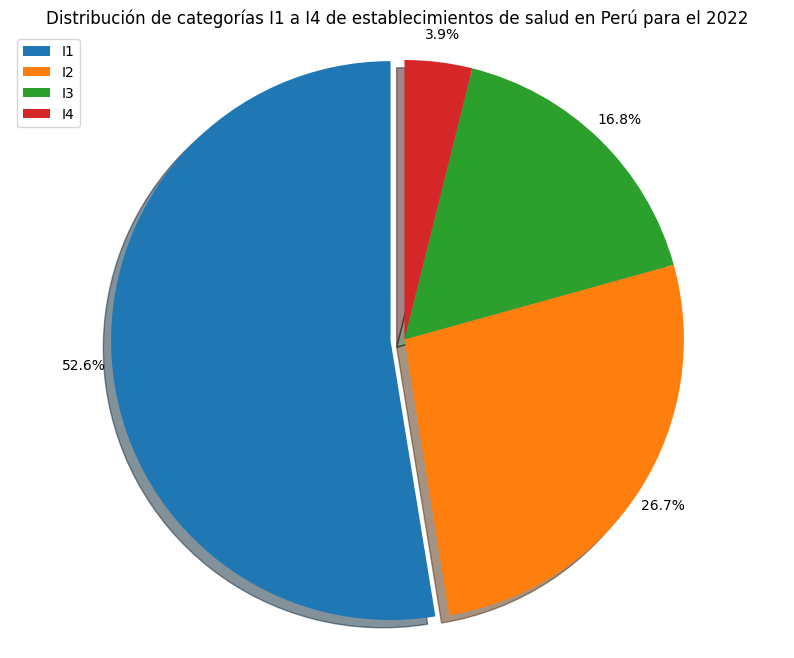

In [ ]:
# Calcula la suma de las categorías I1 hasta I4 en todos los distritos
total_I1 = df_por_categoria['Categoria_I-1'].sum()
total_I2 = df_por_categoria['Categoria_I-2'].sum()
total_I3 = df_por_categoria['Categoria_I-3'].sum()
total_I4 = df_por_categoria['Categoria_I-4'].sum()

explode_list = [0.05, 0, 0, 0] # ratios para alejar las porciones (continentes) del centro.
# Crea un gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie([total_I1, total_I2, total_I3, total_I4],
        labels=None, shadow=True,
        autopct='%1.1f%%', startangle=90,explode=explode_list, pctdistance=1.1)
plt.title("Distribución de categorías I1 a I4 de establecimientos de salud en Perú para el 2022")
plt.axis('equal')  # Para que el pie no se sobreponga con la leyenda.
plt.legend(labels = ['I1', 'I2', 'I3', 'I4'], loc='upper left')  # añade leyenda
# Muestra el gráfico
plt.show()

El gráfico pie chart permite observar que en el Perú la mayor cantidad de establecimiento de salud pertenencen a la categoría I-1, lo cual indica un bajo nivel de preparación de los establecimientos de salud. Se pueden tener una cantidad alta de establecimientos de salud; sin embargo, eso no significa que todos sean de calidad.

**Gráfica de barras de la cantidad de establecimientos de salud en la categoría I_4**

In [ ]:
df_I4 = df_oficial[df_oficial.AÑO == 2022].sort_values(by=['Categoria_I-4'], ascending=False, axis=0, inplace=False)
df_I4.head(10)

,Departamento,Provincia,Distrito,AÑO,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
26694,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,2022,0.0,18.0,4.0,5.0
26010,LIMA,LIMA,CHORRILLOS,2022,0.0,10.0,6.0,4.0
30380,PIURA,PIURA,PIURA,2022,1.0,2.0,2.0,3.0
32546,PUNO,SAN ROMAN,JULIACA,2022,2.0,7.0,5.0,3.0
26675,LIMA,LIMA,VILLA EL SALVADOR,2022,0.0,13.0,5.0,3.0
26352,LIMA,LIMA,PUENTE PIEDRA,2022,0.0,2.0,5.0,3.0
13090,CALLAO,CALLAO,CALLAO,2022,0.0,23.0,2.0,3.0
30418,PIURA,PIURA,VEINTISEIS DE OCTUBRE,2022,0.0,1.0,5.0,2.0
26048,LIMA,LIMA,COMAS,2022,0.0,7.0,15.0,2.0
13185,CALLAO,CALLAO,VENTANILLA,2022,0.0,12.0,0.0,2.0


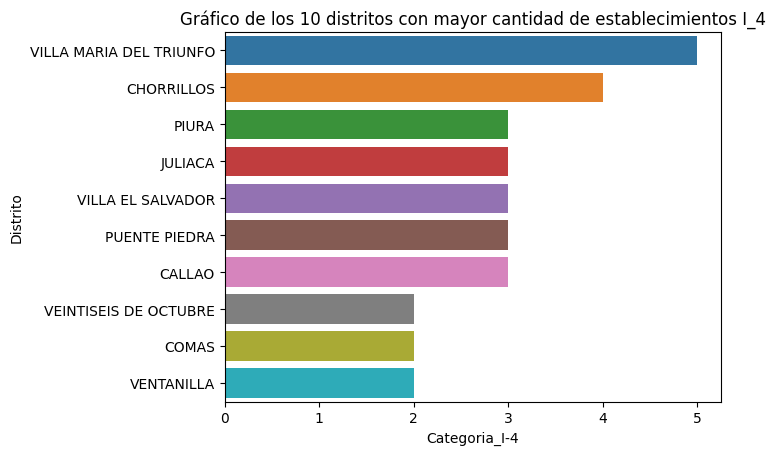

In [ ]:
sns.barplot(data= df_I4.head(10), x="Categoria_I-4", y="Distrito")
plt.title("Gráfico de los 10 distritos con mayor cantidad de establecimientos I_4")
plt.show()

La mitad de los 10 distritos con mayor cantidad de establecimientos en la categoria I-4 pertenecen al departamento de Lima. Esto puede reflejar una acumulación de centros de salud de mayor calidad en la capital del Perú

**Gráfica de barras de la cantidad de establecimientos de salud en la categoría I_1**

In [ ]:
df_I1 = df_oficial[df_oficial.AÑO == 2022].sort_values(by=['Categoria_I-1'], ascending=False, axis=0, inplace=False)
df_I1.head(10)

,Departamento,Provincia,Distrito,AÑO,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4
11760,CAJAMARCA,CUTERVO,CUTERVO,2022,40.0,9.0,6.0,0.0
27530,LORETO,ALTO AMAZONAS,YURIMAGUAS,2022,33.0,1.0,9.0,1.0
11988,CAJAMARCA,HUALGAYOC,BAMBAMARCA,2022,30.0,5.0,5.0,0.0
94,AMAZONAS,BAGUA,IMAZA,2022,29.0,5.0,5.0,0.0
21526,JUNIN,SATIPO,PANGOA,2022,27.0,5.0,4.0,0.0
11304,CAJAMARCA,CHOTA,CHOTA,2022,25.0,4.0,2.0,0.0
1500,AMAZONAS,UTCUBAMBA,CAJARURO,2022,25.0,0.0,8.0,0.0
778,AMAZONAS,CONDORCANQUI,NIEVA,2022,22.0,1.0,7.0,0.0
29164,PASCO,DANIEL ALCIDES CARRION,YANAHUANCA,2022,22.0,2.0,1.0,1.0
29582,PIURA,AYABACA,AYABACA,2022,22.0,7.0,0.0,1.0


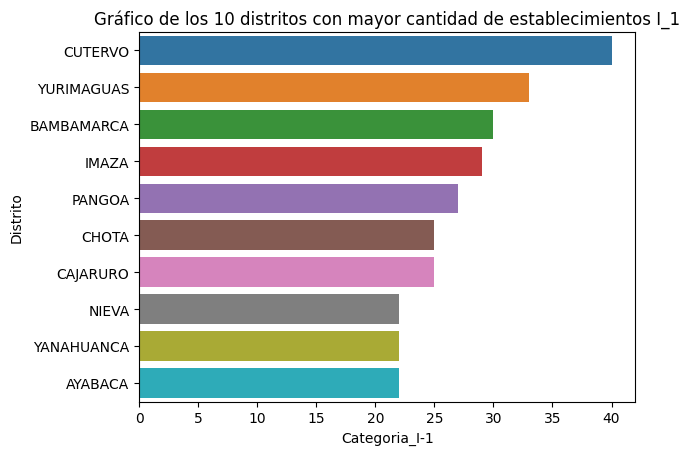

In [ ]:
sns.barplot(data= df_I1.head(10), x="Categoria_I-1", y="Distrito")
plt.title("Gráfico de los 10 distritos con mayor cantidad de establecimientos I_1")
plt.show()

El distrito con una mayor cantidad de establecimientos I-1 permanece al departamento de Cajamarca.

**Gráfica de evolución en la cantidad de establecimientos en el departamento de Cajamarca**

In [ ]:
df_total = df_oficial.copy()
df_total["Total"]= df_total.loc[:, df_total.columns != "AÑO"].sum(numeric_only=True, axis=1) # Adiciona columna Total

In [ ]:
result = df_total[df_total.AÑO == 2022].groupby(['Departamento'])['Total'].sum()
df_result = result.reset_index()
df_result.sort_values(by=['Total'], ascending=False, axis = 0, inplace = True)
df_result.head(10)
#Se selecciono el departamento de Cajamarca porque tiene la mayor cantidad de establecimientos

,Departamento,Total
5,CAJAMARCA,863.0
14,LIMA,723.0
11,JUNIN,504.0
0,AMAZONAS,480.0
20,PUNO,468.0
15,LORETO,449.0
19,PIURA,421.0
1,ANCASH,414.0
4,AYACUCHO,412.0
8,HUANCAVELICA,409.0


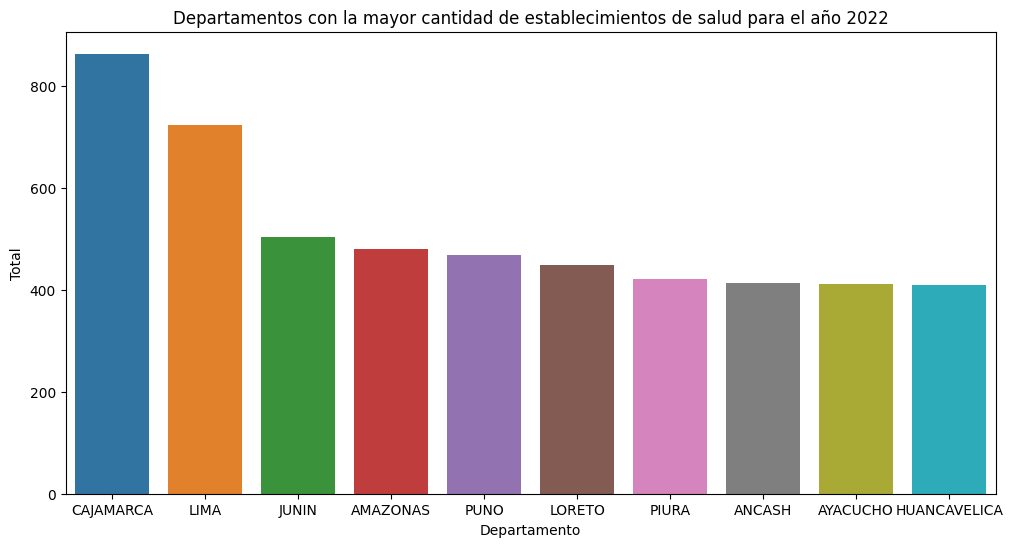

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df_result.head(10), x = 'Departamento', y = 'Total' )
plt.title("Departamentos con la mayor cantidad de establecimientos de salud para el año 2022")
plt.show()

In [ ]:
df_cajamarca = df_total.groupby(['Departamento', 'AÑO'])['Total'].sum()
df_cajamarca = df_cajamarca.reset_index()  # Convierte el resultado en un DataFrame
df_cajamarca_2= df_cajamarca[df_cajamarca['Departamento'] == 'CAJAMARCA']
df_cajamarca_2

,Departamento,AÑO,Total
95,CAJAMARCA,2004,610.0
96,CAJAMARCA,2005,648.0
97,CAJAMARCA,2006,702.0
98,CAJAMARCA,2007,715.0
99,CAJAMARCA,2008,727.0
100,CAJAMARCA,2009,758.0
101,CAJAMARCA,2010,805.0
102,CAJAMARCA,2011,810.0
103,CAJAMARCA,2012,816.0
104,CAJAMARCA,2013,828.0


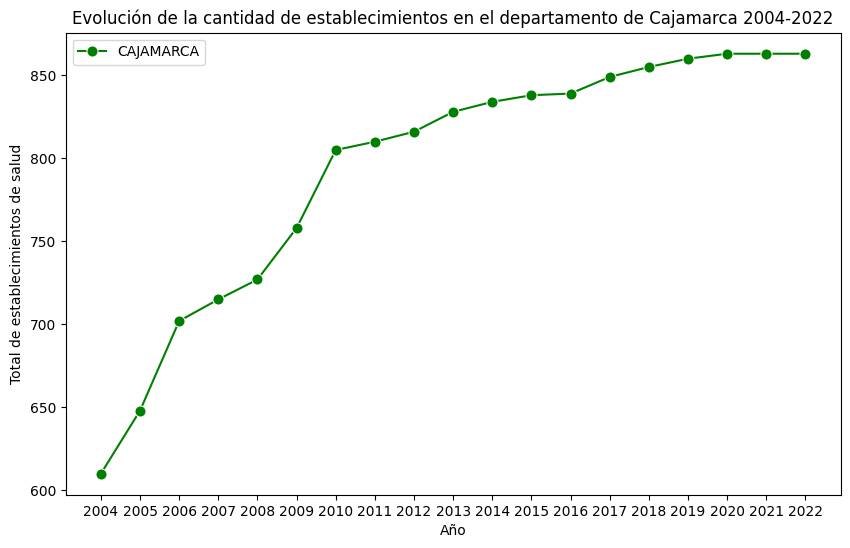

In [ ]:
plt.figure(figsize=(10, 6))
# Crea el gráfico de líneas con marcadores
sns.lineplot(data=df_cajamarca_2, x='AÑO', y='Total', marker='o', markersize=8, color='g', label='CAJAMARCA')

plt.xlabel("Año")
plt.ylabel("Total de establecimientos de salud")
plt.title("Evolución de la cantidad de establecimientos en el departamento de Cajamarca 2004-2022")
# Muestra el gráfico
plt.xticks(range(2004, 2023))
plt.show()

En este gráfico se representa la evolución del departamento de Cajamarca, que tiene la mayor cantidad de establecimientos de salud de primer nivel, a lo largo de los años 2004 hasta 2022. También, el mayor aumento en la cantidad de establecimientos ocurrió entre los años 2006 y 2010.

**Gráfico de barras de los departamentos con una menor cantidad de establecimientos de salud**

In [ ]:
result = df_total[df_total.AÑO == 2022].groupby('Departamento')['Total'].sum()
df_resultM = result.reset_index()
df_resultM.sort_values(by=['Total'], ascending=True, axis = 0, inplace = True)
df_resultM.head(10)

,Departamento,Total
23,TUMBES,44.0
6,CALLAO,55.0
17,MOQUEGUA,63.0
22,TACNA,77.0
16,MADRE DE DIOS,90.0
10,ICA,143.0
13,LAMBAYEQUE,185.0
24,UCAYALI,220.0
3,AREQUIPA,256.0
18,PASCO,257.0


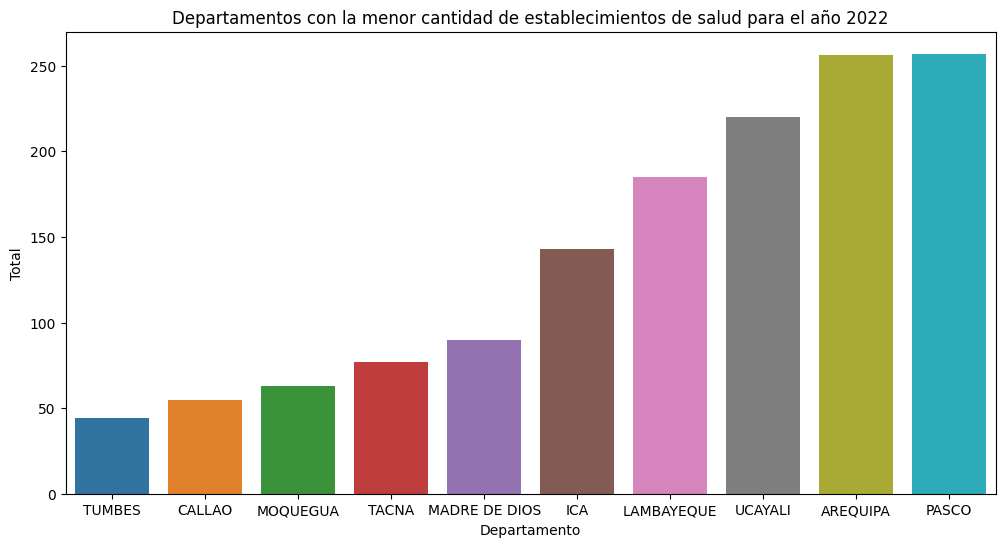

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df_resultM.head(10), x = 'Departamento', y = 'Total')
plt.title("Departamentos con la menor cantidad de establecimientos de salud para el año 2022")
plt.show()

El departamento con una menor cantidad de establecimientos de salud es Tumbes, seguido por el Callao y a continuación Moquegua. El análisis de este gráfico se debe complementar con un análisis de la densidad poblacional por departamento para verificar si la cantidad de establecimientos satisface la población.

# **<font color="skyblue">Exportar CSV**

In [ ]:
# Crear columna key para la concatenación con otras tablas
df_oficial['key'] = df_oficial['Departamento'] + df_oficial['Provincia'] + df_oficial['Distrito'] + df_oficial['AÑO'].astype(str)
df_oficial = df_oficial.drop(['Distrito', 'Provincia', 'Departamento', 'AÑO'], axis=1)

In [ ]:
# Exportar data en csv para continuar con el proceso
df_oficial.to_csv("Hospitales.csv",index=False)